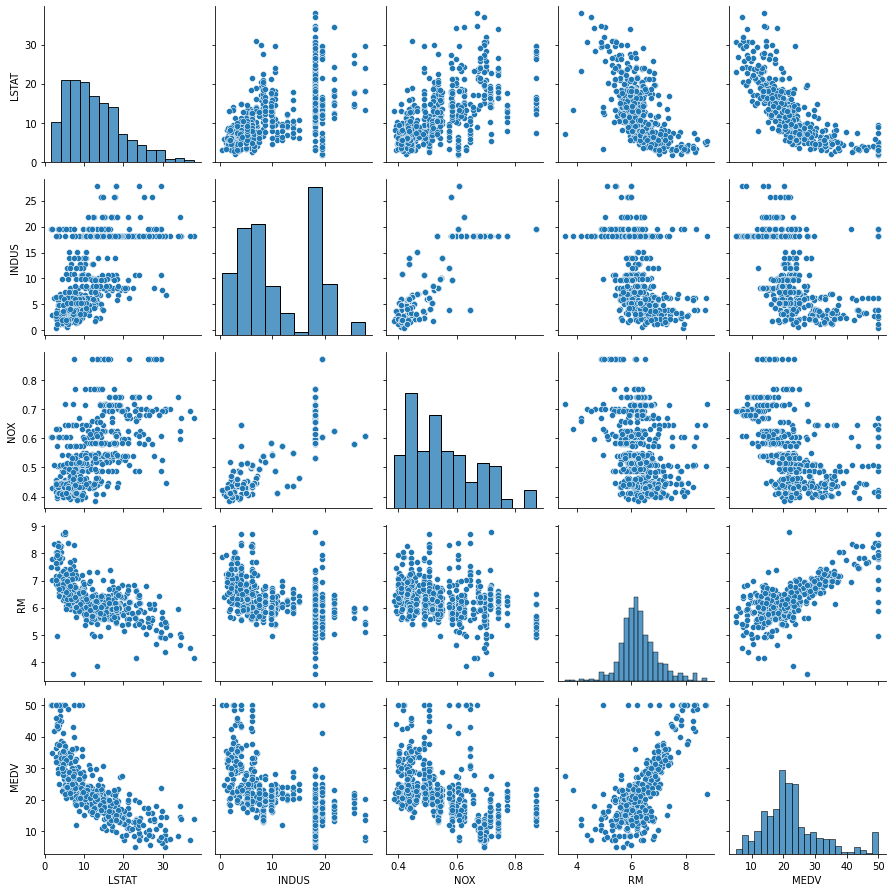

In [6]:
!pip install seaborn
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/rasbt/'
              'python-machine-learning-book-2nd-edition'
              '/master/code/ch10/housing.data.txt',
              sep='\s+')
df.columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
df.head()

import matplotlib.pyplot as plt
import seaborn as sns
cols=['LSTAT','INDUS','NOX','RM','MEDV']
sns.pairplot(df[cols],height=2.5)
plt.tight_layout()
plt.show()

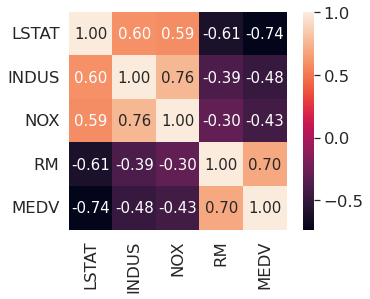

In [7]:
import numpy as np
cm=np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm=sns.heatmap(cm,
              cbar=True,
              annot=True,square=True,fmt='.2f',annot_kws={'size':15},
              yticklabels=cols,
              xticklabels=cols)
plt.show()

In [9]:
X=df[['RM']].values
Y=df[['MEDV']].values
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X,Y)
print('Slope: %.3f'%lr.coef_[0])
print('Intercept:%.3f'%lr.intercept_)


Slope: 9.103
Intercept:-34.677


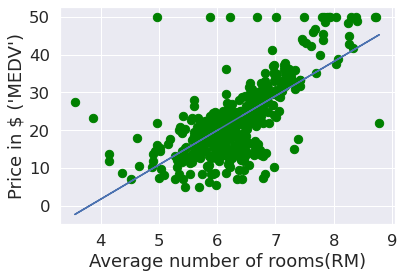

In [10]:
def lin_regplot(X,Y,model):
    plt.scatter(X,Y,c='green',s=70)
    plt.plot(X,model.predict(X))
    return None

lin_regplot(X,Y,lr)
plt.xlabel("Average number of rooms(RM)")
plt.ylabel("Price in $ ('MEDV')")
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
X=df.iloc[:,:-1].values
Y=df['MEDV'].values
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)
lr=LinearRegression()
lr.fit(X_train,Y_train)
Y_train_pred=lr.predict(X_train)
Y_test_pred=lr.predict(X_test)

from sklearn.metrics import mean_squared_error,r2_score
print('MSE train: %.3f, test: %.3f'%(mean_squared_error(Y_train,Y_train_pred),
                                    mean_squared_error(Y_test,Y_test_pred)))

print('R^2 train: %.3f, test: %.3f'%(r2_score(Y_train,Y_train_pred),
                                    r2_score(Y_test,Y_test_pred)))

MSE train: 21.305, test: 25.467
R^2 train: 0.748, test: 0.699
